<a href="https://colab.research.google.com/github/rochefort8/AnalogCounter-NN/blob/master/analogcounter_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 新しいセクション

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

!rm -rf /var/test
!rm -rf /var/input

!tar zxpf  "/content/drive/My Drive/AC/input.tar.gz" -C /var 
!tar zxpf  "/content/drive/My Drive/AC/test.tar.gz" -C /var 
#!tar zxpf /var/input.tar.gz -C /var
#!tar zxpf /var/test.tar.gz -C /var

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#!rm /var/input.tar.gz

In [0]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from PIL import Image
from io import BytesIO 

import cv2 as cv

import matplotlib.pyplot as plt
import numpy as np
import os

from keras.preprocessing.image import array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten, Input, add
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras import Model
from keras import backend as K

def rescell(data, filters, kernel_size, option=False):
    strides=(1,1)
    if option:
        strides=(2,2)
    x=Conv2D(filters=filters,kernel_size=kernel_size,strides=strides,padding="same")(data)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    
    data=Conv2D(filters=int(x.shape[3]), kernel_size=(1,1), strides=strides, padding="same")(data)
    x=Conv2D(filters=filters,kernel_size=kernel_size,strides=(1,1),padding="same")(x)
    x=BatchNormalization()(x)
    x=add([x,data])
    x=Activation('relu')(x)
    return x

def ResNet(img_rows, img_cols, img_channels, x_train):
	input=Input(shape=(img_rows,img_cols,img_channels))
	x=Conv2D(32,(7,7), padding="same", input_shape=x_train.shape[1:],activation="relu")(input)
	x=MaxPooling2D(pool_size=(2,2))(x)

	x=rescell(x,64,(3,3))
	x=rescell(x,64,(3,3))
	x=rescell(x,64,(3,3))

	x=rescell(x,128,(3,3),True)

	x=rescell(x,128,(3,3))
	x=rescell(x,128,(3,3))
	x=rescell(x,128,(3,3))

	x=rescell(x,256,(3,3),True)

	x=rescell(x,256,(3,3))
	x=rescell(x,256,(3,3))
	x=rescell(x,256,(3,3))
	x=rescell(x,256,(3,3))
	x=rescell(x,256,(3,3))

	x=rescell(x,512,(3,3),True)

	x=rescell(x,512,(3,3))
	x=rescell(x,512,(3,3))

	x=AveragePooling2D(pool_size=(int(x.shape[1]),int(x.shape[2])),strides=(2,2))(x)

	x=Flatten()(x)
	x=Dense(units=10,kernel_initializer="he_normal",activation="softmax")(x)
	model=Model(inputs=input,outputs=[x])
	return model

  # 入力画像の次元とチャンネル
img_rows, img_cols, img_channels = 28, 28, 1

In [0]:

# the data, split between train and test sets
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# print(type(y_train))

0
1
2
3
4
5
6
7
8
9
4


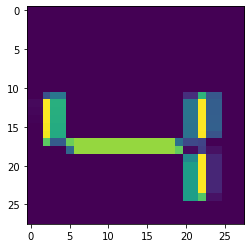

In [0]:
X=[]
Y=[]

for number in range (10):  
  path = "/var/input/" + str(number) + "/"
  files = os.listdir(path)
  print(number)
  for file in files:
      img = np.asarray(cv.imread(path + file,0))

#      threshold = 66
#      ret,img = cv.threshold(img,threshold,255,cv.THRESH_TOZERO)
#      threshold = 100
#      ret,img = cv.threshold(img,threshold,255,cv.THRESH_BINARY)

      X.append(img)
      Y.append(number)

np.random.seed(1)
np.random.shuffle(X)
np.random.seed(1)
np.random.shuffle(Y)

_x_train, _x_test, _y_train, _y_test =train_test_split(X, Y, test_size=0.33, random_state=111)

x_train = np.array(_x_train)
x_test = np.array(_x_test)
y_train = np.array(_y_train)
y_test = np.array(_y_test)

idx = 704
plt.imshow(x_train[idx])
print(y_train[idx])

#(x_train, y_train), (x_test, y_test) = mnist.load_data()
XX=[]
YY=[]

for number in range (10):  
  path = "/var/test/" + "{:02d}".format(number) + "/"
  files = os.listdir(path)
  del XX[:]
  del YY[:]
  for file in files:
#      im2 = Image.open(path + file)
      img = np.asarray(cv.imread(path + file,0))
      threshold = 66
      ret,img = cv.threshold(img,threshold,255,cv.THRESH_TOZERO)
#      threshold = 100
#      ret,img = cv.threshold(img,threshold,255,cv.THRESH_BINARY)
      XX.append(img)
      YY.append(number)

np.random.seed(1)
np.random.shuffle(XX)
np.random.seed(1)
np.random.shuffle(YY)

#x_test = np.array(XX)
#y_test = np.array(YY)


In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


model=ResNet(img_rows,img_cols,img_channels, x_train)
#model.compile(loss='categorical_crossentropy',
#                  optimizer='adam',
#                  metrics=['accuracy'])

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

model.save('/var/tmp/ac')
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)

x_train shape: (12614, 28, 28, 1)
12614 train samples
6213 test samples
















Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 12614 samples, validate on 6213 samples
Epoch 1/12
12614/12614 [==============================] - 49s 4ms/step - loss: 1.6678 - acc: 0.4397 - val_loss: 2.9529 - val_acc: 0.4882
Epoch 2/12
12614/12614 [==============================] - 35s 3ms/step - loss: 0.2573 - acc: 0.9282 - val_loss: 2.6054 - val_acc: 0.5762
Epoch 3/12
12614/12614 [==============================] - 35s 3ms/step - loss: 0.1168 - acc: 0.9664 - val_loss: 0.5577 - val_acc: 0.8904
Epoch 4/12
12614/12614 [==============================] - 35s 3ms/step - loss: 0.0500 - acc: 0.9880 - val_loss: 0.4624 - val_acc: 0.8915
Epoch 5/12
12614/12614 [==============================] - 35s 3ms/step - loss: 0.0466 - acc: 0.9876 - val_loss: 0.0590 - val_acc: 0.9808
Epoch 6/12
12614/12614 [==============================] - 35s 3ms/step - loss: 0.0

Number :0
Test loss: 0.00014617960550822318
Test accuracy: 1.0
Number :1
Test loss: 2.0984145521651953e-05
Test accuracy: 1.0
Number :2
Test loss: 0.001144096371717751
Test accuracy: 1.0
Number :3
Test loss: 0.18664388358592987
Test accuracy: 0.9599999785423279
Number :4
Test loss: 0.0004607090959325433
Test accuracy: 1.0
Number :5
Test loss: 1.6706131646060385e-05
Test accuracy: 1.0
Number :6
Test loss: 0.5660263299942017
Test accuracy: 0.8799999952316284
Number :7
Test loss: 0.0046902550384402275
Test accuracy: 1.0
Number :8
Test loss: 0.0003873297537211329
Test accuracy: 1.0
Number :9
Test loss: 1.1859017831739038e-05
Test accuracy: 1.0
=== Total ====
Test loss: 0.07595480647147633
Test accuracy: 0.984


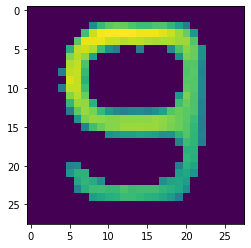

In [0]:
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
XX=[]
YY=[]

for number in range (10):  
  path = "/var/test/" + "{:02d}".format(number) + "/"
  files = os.listdir(path)
  del XX[:]
  del YY[:]
  for file in files:
#      im2 = Image.open(path + file)
      img = np.asarray(cv.imread(path + file,0))

      threshold = 66
      ret,img = cv.threshold(img,threshold,255,cv.THRESH_TOZERO)
#      threshold = 100
#      ret,img = cv.threshold(img,threshold,255,cv.THRESH_BINARY)
      XX.append(img)
      YY.append(number)


  x_data = np.array(XX)
  y_data = np.array(YY)
  plt.imshow(x_data[0])
  
  if K.image_data_format() == 'channels_first':
      x_data = x_data.reshape(x_data.shape[0], 1, img_rows, img_cols)
  else:
      x_data = x_data.reshape(x_data.shape[0], img_rows, img_cols, 1)

  x_data = x_data.astype('float32')
  x_data /= 255
  y_data = keras.utils.to_categorical(y_data, num_classes)
  score = model.evaluate(x_data, y_data, verbose=0)
  print('Number :' +str(number))
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
#  expect = model.predict_classes(x_data,batch_size=5)
#  expect = model.predict(x_data,batch_size=5)
#  expect = model.predict(x_data)
#  print(expect)

del XX[:]
del YY[:]

for number in range (10):  
  path = "/var/test/" + "{:02d}".format(number) + "/"
  files = os.listdir(path)
  for file in files:
      im2 = Image.open(path + file)
      img = np.asarray(cv.imread(path + file,0))
      threshold = 66
      ret,img = cv.threshold(img,threshold,255,cv.THRESH_TOZERO)
#      threshold = 100
#      ret,img = cv.threshold(img,threshold,255,cv.THRESH_TOZERO)
#      ret,img = cv.threshold(img,threshold,255,cv.THRESH_BINARY)
      XX.append(img)
      YY.append(number)

np.random.seed(1)
np.random.shuffle(XX)
np.random.seed(1)
np.random.shuffle(YY)

x_data = np.array(XX)
y_data = np.array(YY)
if K.image_data_format() == 'channels_first':
    x_data = x_data.reshape(x_data.shape[0], 1, img_rows, img_cols)
else:
    x_data = x_data.reshape(x_data.shape[0], img_rows, img_cols, 1)

x_data = x_data.astype('float32')
x_data /= 255
y_data = keras.utils.to_categorical(y_data, num_classes)
score = model.evaluate(x_data, y_data, verbose=0)
print('=== Total ====')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

